In this lab, we'll build a fairly simple AI classifier to find out if adopting a cat or a dog will make me happier. This is a pretty subjective question, so instead of using a dataset from the internet, we'll collect our own and use it to train a neural network to predict happiness.

Here's what we need to do:

*   Step 1: Decide on a few features about cats and dogs, and then conduct a survey to collect data about those features and whether they're linked to owner happiness
*   Step 2: Build an AI model to predict if a specific pet makes people happy. Because we're not collecting a massive amount of data, we'll plan on using a neural network with one hidden layer. 
*   Step 3: Go through an adoption website, input their features into our AI, and let it decide which pet will make me happy!


# Step 1. Input survey results

Instead of importing a dataset, we created our own! We chose 4 common features of dogs and cats: cuddly, soft, quiet, and energetic. And as our label, we want to know whether people are happy with their pets. 

For the data collection part of this process, we gave this five-question survey of yes/no questions to 30 people who own one cat or one dog. 

Then, we need to convert these results into features and labels. So we can put everyone’s answers into one big list, where every row is one person’s survey response. Yes is represented as 1 and No is represented as 0.

We also have to split this dataset into the training set and the testing set. The training set is used to train the neural network, and the testing set is kept hidden from the neural network during training, so we can use it to check the network’s accuracy later.

**Step 1.1**

In [13]:
import numpy as np
# Column names:  Energetic, Cuddly, Soft, Quiet, Happiness
survey = np.array([
  [1, 0, 1, 1, 1],  #     Energetic, Not Cuddly, Soft, Quiet,     Happy
  [1, 1, 1, 1, 1],  #     Energetic,     Cuddly, Soft, Quiet,     Happy
  [1, 0, 1, 0, 1],  #     Energetic, Not Cuddly, Soft, Loud,      Happy
  [0, 0, 1, 0, 0],  # Not Energetic, Not Cuddly, Soft, Loud,  Not happy
  [0, 1, 0, 1, 0],  # ...
  [0, 0, 0, 1, 0],
  [1, 1, 0, 0, 1],
  [0, 1, 0, 0, 0],
  [0, 1, 0, 1, 0],
  [0, 1, 0, 0, 0],
  [1, 0, 1, 1, 1],
  [0, 1, 1, 1, 0],
  [1, 0, 1, 0, 1],
  [0, 0, 1, 0, 0],
  [0, 1, 0, 1, 0],
  [0, 0, 0, 1, 0],
  [1, 1, 0, 0, 1],
  [0, 0, 0, 0, 0],
  [1, 0, 1, 1, 1],
  [1, 1, 1, 1, 0],
  [1, 0, 1, 0, 1],
  [1, 1, 1, 0, 1],
  [0, 0, 0, 0, 1],
  [0, 0, 0, 1, 1],
  [0, 0, 1, 1, 1],
  [0, 1, 1, 1, 1]
])
# CHANGEME -- You can put in your own survey results as well.

# First four columns are our features
features_train = survey[:,0:4]
# Last column is our label
labels_train = survey[:,4]

# Keeping four surveys as our test set
test_survey = np.array([
  [1, 1, 1, 0, 1],
  [0, 0, 0, 1, 0],
  [0, 0, 1, 0, 0],
  [1, 0, 1, 0, 1]
])

features_test = test_survey[:, 0:4]
labels_test = test_survey[:,4]

# Step 2. Build and train an AI classifier

Next, we need to build a neural network and train it to help us make predictions. We're going to import a library called SKLearn and use its algorithms to build a simple multi-layer perceptron neural network or MLP. 

As a refresher, this neural network has an input layer for features, some number of hidden layers to learn representations, and a final output layer to make a prediction. The hidden layers find relationships between the features that help it make accurate predictions.

There are a lot of parameters we can play with here! But we'll start with something simple: four input features, one hidden layer (with four neurons, the same size as our input), and two outputs (YES, happiness, or NO, unhappiness). SKLearn actually takes care of counting the size of our input and output automatically, so we only have to specify the hidden layers in the code. 

Over the span of one epoch of training this neural network, the hidden layer will pick up on patterns in the input features, and pass a prediction to one of two output neurons. The code calls this an “iteration” because an iteration and an epoch are the same thing in the algorithm we’re using. Over multiple epochs of the same training dataset, the neural network’s predictions should keep getting better! So we’ll just go with 1000 epochs for now. 


**Step 2.1**

In [14]:
from sklearn.neural_network import MLPClassifier
from warnings import filterwarnings
filterwarnings('ignore')

# Define the model
mlp = MLPClassifier(hidden_layer_sizes=(4,),  # CHANGEME
                    activation='tanh',        # ADVANCED_CHANGEME
                    max_iter=1000,            # CHANGEME
                    random_state=1   
                   )

# Train the model
mlp.fit(features_train, labels_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(4,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Now, we can test our AI classifier on the original training data to see how well it captured that information, and on the testing data we set aside to see how good its predictions are.

**Step 2.2**

In [15]:
print("Training set score: %f" % mlp.score(features_train, labels_train))
print("Testing set score: %f" % mlp.score(features_test, labels_test))

Training set score: 0.846154
Testing set score: 1.000000


# Step 3. Make predictions

Well, this project is almost over! Everything was easy to do, and the performance looks perfect. We can just put in some pet features and let it help with a big life decision! AI really is awesome.

Should I get a cat? Let me try some cats, the first is not Energetic (lazy), Cuddly, Soft, and Quiet pet? We can encode that as:

*   Not Energetic = 0
*   Cuddly = 1
*   Soft = 1
*   Quiet = 1

So our features are ```[[0, 1, 1, 1]]```

The others are also lazy:

```[[0, 0, 1, 1]]```
```[[0, 1, 1, 0]]```
```[[0, 1, 0, 1]]```

**Step 3.1** 

In [16]:
# Energetic, Cuddly, Soft, Quiet
features = [[0, 1, 1, 1]]    # CHANGEME
print("Yes!" if mlp.predict(features)[0] else "No!")

features = [[0, 0, 1, 1]]    # CHANGEME
print("Yes!" if mlp.predict(features)[0] else "No!")
features = [[0, 1, 1, 0]]    # CHANGEME
print("Yes!" if mlp.predict(features)[0] else "No!")
features = [[0, 1, 0, 1]]    # CHANGEME
print("Yes!" if mlp.predict(features)[0] else "No!")

No!
Yes!
No!
No!


Interesting, let's try another one. Should I get a dog that is Energetic, not Cuddly, not Soft, and not Quiet?

*   Energetic = 1
*   Not Cuddly = 0
*   Not Soft = 0
*   Not Quiet = 0

So our features are ```[[1, 0, 0, 0]]```

Let me try more dogs:

```[[1, 0, 0, 0]]```
```[[1, 1, 0, 0]]```
```[[1, 0, 1, 0]]```
```[[1, 0, 0, 1]]```

**Step 3.2** 

In [17]:
# Energetic, Cuddly, Soft, Quiet
features = [[1, 0, 0, 0]]    # CHANGEME
print("Yes!" if mlp.predict(features)[0] else "No!")

features = [[1, 1, 0, 0]]    # CHANGEME
print("Yes!" if mlp.predict(features)[0] else "No!")

features = [[1, 0, 1, 0]]    # CHANGEME
print("Yes!" if mlp.predict(features)[0] else "No!")

features = [[1, 0, 0, 1]]    # CHANGEME
print("Yes!" if mlp.predict(features)[0] else "No!")

Yes!
Yes!
Yes!
Yes!


# Step 4.  Data analysis

So, obviously, AI doesn’t have a grudge against cats. We collected the survey data and built the AI, so if something went wrong and introduced an anti-cat bias… it’s on us, and we can audit our AI to figure out what it is.

Particularly in problems where we have a small set of features, we can actually visualize all the correlations between those features. To do this, we'll use some bar plot and database libraries:
```
matplotlib, seaborn, pandas
```


What’s weird is that the model’s predictions don’t make sense, despite the high performance. Specifically, there seems to be a bias towards dogs. Are dog owners generally happier than cat owners?? 

Earlier, we decided to just pool all the survey results together, but now we'll split them apart. We can create plots that compare the percentage of dog owners surveyed who are happy, the percentage of cat owners surveyed who are happy, and the percentage of all the people surveyed who are happy with their pets (no matter what kind). 

To do this, we just need to compute the number of happy dog owners divided by the total number of dog owners, the number of happy cat owners divided by the total number of cat owners, and the number of happy pet owners divided by the total number of people we surveyed.

**Step 4.1**


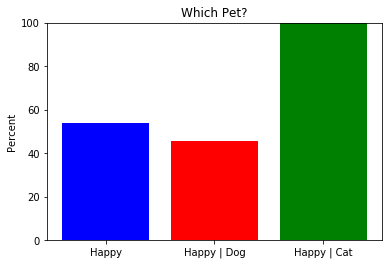

In [18]:
# Split the survey up into the cat and dog entries
dog_survey = survey[:-4]  
cat_survey = survey[-4:]

# Import plotting library
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ind = np.arange(1, 4)

# Add up the number of survey participants who are happy and
# divide by the total number of participants of each type
happy_dog = 100*np.sum(dog_survey,axis=0)[-1]/dog_survey.shape[0]
happy_cat = 100*np.sum(cat_survey,axis=0)[-1]/cat_survey.shape[0]
happy = 100*np.sum(survey, axis=0)[-1]/survey.shape[0]

# Make a bar chart
pt, pd, pc = plt.bar(ind, (happy, happy_dog, happy_cat))

# Assign colors to bars
pt.set_facecolor('b')
pd.set_facecolor('r')
pc.set_facecolor('g')

# Put labels on everything
ax.set_xticks(ind)
ax.set_xticklabels(['Happy', 'Happy | Dog', 'Happy | Cat'])
ax.set_ylim([0, 100])
ax.set_ylabel('Percent')
_ = ax.set_title('Which Pet?')

Well, that's confusing. According to our survey results, 100% of cat owners are happy and the dog owners are kind of split. But when we put in the features for a cat, our AI classifier usually says it won’t make the owner happy. What's wrong?

Let's look at a different dimension of our data and plot the total number of survey responses from dog owners and cat owners.


**Step 4.2** 

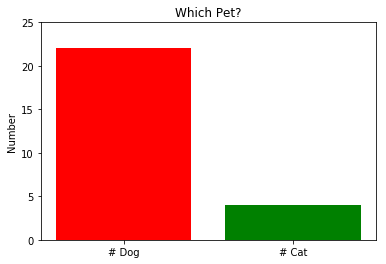

In [19]:
# Import library to make plots
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ind = np.arange(1, 3)

# Count the number of responses from dog vs cat owners
dog = dog_survey.shape[0]
cat = cat_survey.shape[0]

# Make a bar chart
pd, pc = plt.bar(ind, (dog, cat))

# Assign colors to bars
pd.set_facecolor('r')
pc.set_facecolor('g')

# Put labels on everything
ax.set_xticks(ind)
ax.set_xticklabels(['# Dog', '# Cat'])
ax.set_ylim([0, 25])
ax.set_ylabel('Number')
_ = ax.set_title('Which Pet?')

Yikes! A lot of people who responded to our survey owned dogs. So our **first mistake** is that the dataset we used doesn’t actually have the same distributions as the real world. Instead of collecting the true frequencies of each feature from a large random group of pet owners, we accidentally sampled from a dog-biased set. 

That’s definitely something that should be fixed… but it still doesn’t answer why the model seems so biased against cats. Both cats and dogs can be energetic, cuddly, quiet, and soft. That’s why we chose those features, they seemed like they’d be common for both pets. 

But we can test this. We'll plot how often each feature is true for both dogs and cats by dividing the number of times each feature is true for each animal by the total number of survey responses we have for each animal.  


**Step 4.3** 

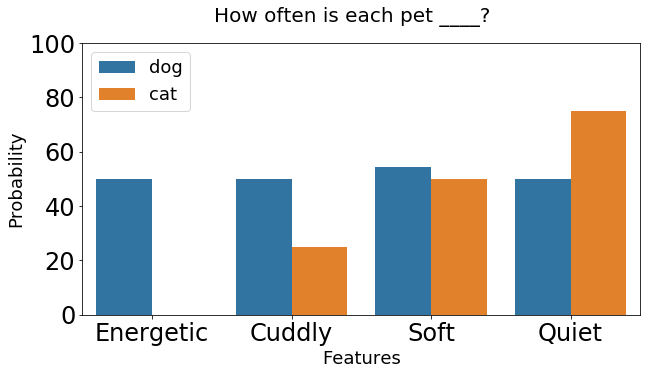

In [20]:
# Import libraries to build a plot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ind = np.arange(0, 4)

# Count number of dog and cat surveys
total_dog = dog_survey.shape[0]
total_cat = cat_survey.shape[0]

# Count how often each feature is true divided by how many dogs and cats we have
cat_probabilities = 100*cat_survey[:,:4].sum(axis=0)/total_cat
dog_probabilities = 100*dog_survey[:,:4].sum(axis=0)/total_dog

# Input the data into a bar plot
data = {'Feature':[], 'Animal':[], 'Probability':[]}
for feature in range(4):
  data['Feature'].append(feature)
  data['Animal'].append('dog')
  data['Probability'].append(dog_probabilities[feature])

  data['Feature'].append(feature)
  data['Animal'].append('cat')
  data['Probability'].append(cat_probabilities[feature])
df = pd.DataFrame(data=data)

_ = sns.barplot(x='Feature', y='Probability', hue='Animal', data=df, ax=ax)

# Label everything
ax.set_xticklabels(['Energetic', 'Cuddly', 'Soft', 'Quiet'])
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
_ = fig.suptitle('How often is each pet ____?', fontsize=20)
_ = plt.ylabel('Probability', fontsize=18)
_ = ax.set_ylim([0, 100])
_ = plt.xlabel('Features', fontsize=18)
_ = plt.legend(loc='best', prop={'size':18})

So it looks like there are lots of different types of dogs in our dataset, but none of the cats are energetic. So this is a **correlated feature**, which is a feature that is (unintentionally) correlated to a specific prediction or hidden category. In this case, knowing if something is energetic is a cheat for knowing it’s a dog even though we didn’t tell the model about dogs. 

My model might have then learned that if a pet is energetic, it makes owners happy, just because there was no data to tell it otherwise. We can see if this weird correlation is real by plotting energetic vs owner happiness. 


**Step 4.4** 

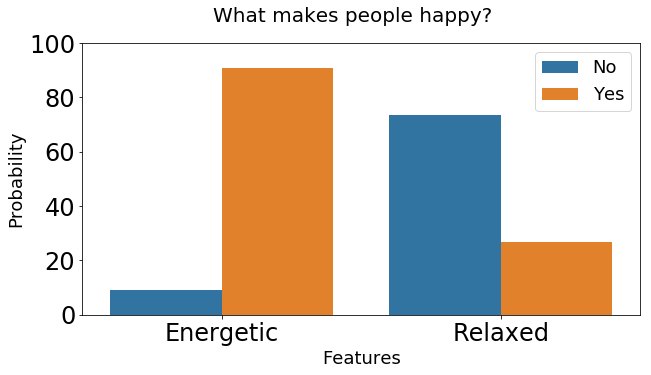

In [21]:
# Import libraries for a plot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ind = np.arange(0, 4)

# Count how often each animal is relaxed or energetic
energetic = [0,0]
energetic_count = 0
relaxed = [0,0]
relaxed_count = 0

for entry in survey:
  if entry[0] == 0:
    relaxed[entry[-1]] += 1
    relaxed_count += 1
  else:
    energetic[entry[-1]] += 1
    energetic_count += 1

# Put the values in a a database
data = {'Feature':[], 'Happy':[], 'Probability':[]}
data["Feature"].append("Energetic")
data["Happy"].append("No")
data["Probability"].append(100*energetic[0]/energetic_count)

data["Feature"].append("Energetic")
data["Happy"].append("Yes")
data["Probability"].append(100*energetic[1]/energetic_count)

data["Feature"].append("walk")
data["Happy"].append("No")
data["Probability"].append(100*relaxed[0]/relaxed_count)

data["Feature"].append("walk")
data["Happy"].append("Yes")
data["Probability"].append(100*relaxed[1]/relaxed_count)

df = pd.DataFrame(data=data)

# Plot bar plot and put labels on everything
_ = sns.barplot(x='Feature', y='Probability', hue='Happy', data=df, ax=ax)
ax.set_xticklabels(['Energetic', 'Relaxed'])
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
_ = fig.suptitle('What makes people happy?', fontsize=20)
_ = plt.ylabel('Probability', fontsize=18)
_ = ax.set_ylim([0, 100])
_ = plt.xlabel('Features', fontsize=18)
_ = plt.legend(loc='best', prop={'size':18})

In our data, if a pet is energetic, a person is very likely to be happy with it... no matter what other features are true. But if the pet isn’t energetic, it’s a mixed bag of happiness. 

So this is definitely our **second mistake**: the data had a correlated feature, so our AI found patterns that we didn’t want. 



<h1>**Few question to think after running the code:**</h1>

What are your thoughts about the performance of the classifier? What does that suggest?

What statistical problems can you identify?

How to fix this bias?